In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from numpy import load

import os
import numpy as np
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:

import tensorflow as tf
print(tf.__version__)

2.1.0


In [1]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 23kB/s 
     |████████████████████████████████| 450kB 55.9MB/s 
     |████████████████████████████████| 3.9MB 58.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=4ee1c329377d3920ceba2746b8834e9db5d1704ab673c05aa778da64ac9e5b23
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installatio

In [0]:
#!python -c 'import tensorflow as tf; print(tf.__version__)'

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
'''print('INFO: reading benign images')
benign_path = '/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Benign_Images/Androguard_and_PreDefined_Values/Benign_Images_16K_Onwards/'
print(len(os.listdir(benign_path)))
benign_imgs = []
images_data = []
count=0
for img in os.listdir(benign_path):
  benign_imgs.append(plt.imread(benign_path + img))
  count+=1
  if(count%500==0):
    print(count)
benign_imgs = np.array(benign_imgs)
#benign_imgs = benign_imgs[:4200]
'''
print('INFO: reading malware images')
malware_path = '/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Malware_Images_geq15l35/'
print(len(os.listdir(malware_path)))
malware_imgs = []
count = 0
for img in os.listdir(malware_path):
  malware_imgs.append(plt.imread((malware_path + img)))
  count+=1
  if(count%500==0):
    print(count)
malware_imgs = np.array(malware_imgs)
#malware_imgs = malware_imgs[:4200]'''

In [0]:
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/XMalware_geq15l35.npy', malware_imgs)

**Benign npy files**

In [0]:
# load numpy array from npy file

benign_imgs_4K = load('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/Benign_Images/Androguard_and_PreDefined_Values/XBenign_4K.npy')
print(benign_imgs_4K.shape)
benign_4k_16K = load('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/Benign_Images/Androguard_and_PreDefined_Values/XBenign_4k_16K.npy')
print(benign_4k_16K.shape)
benign_16k_onward = load('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/Benign_Images/Androguard_and_PreDefined_Values/XBenign_16K_Onwards.npy')
print(benign_16k_onward.shape)

(4003, 64, 64, 3)
(11788, 64, 64, 3)
(13382, 64, 64, 3)


In [16]:
benign_11k = load('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Benign_Images/Androguard_and_PreDefined_Values/Inter_Linear/Benign_Images_signature_12K.npy')
print(benign_11k.shape)
benign_18k = load('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Benign_Images/Androguard_and_PreDefined_Values/Inter_Linear/Ben_imgs_12K_16K_+_16K_onwards_interLinear.npy')
print(benign_18k.shape)

(11200, 64, 64, 3)
(17337, 64, 64, 3)


(11233, 64, 64, 3)


In [0]:
# load numpy array from npy fil3

malware_imgs_31K = load('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/XMalware_geq15l35.npy')
print(malware_imgs_31K.shape)
malware_imgs_4K_22K = load('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/XMalware_4k_22K_geq35.npy')
print(malware_imgs_4K_22K.shape)

(31299, 64, 64, 3)
(17962, 64, 64, 3)


In [14]:
malware_11k = load('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K_2020_19_18_17/Malware_Images_2020_19_18_17.npy')
print(malware_11k.shape)
malware_18k = load('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/18K/Malware_images_2016_2012_18K_geq15_InterLinear.npy')
print(malware_18k.shape)

(11233, 64, 64, 3)
(18109, 64, 64, 3)


In [19]:
Xbenign = np.concatenate((benign_18k[:17300], benign_11k[:11200]), axis=0)
Xmalware = np.concatenate((malware_18k[:17300], malware_11k[:11200]), axis=0)

print(Xbenign.shape)
print(Xmalware.shape)

(28500, 64, 64, 3)
(28500, 64, 64, 3)


In [0]:
Xbenign = benign_18k[:17300]
Xmalware = malware_18k[:17300]

In [0]:
Xbenign = np.concatenate((benign_imgs_4K[:4000], benign_16k_onward[:13300]), axis=0) 

Xmalware = malware_imgs_31K[:17300]
print(Xbenign.shape)
print(Xmalware.shape)

(17300, 64, 64, 3)
(17300, 64, 64, 3)


In [0]:
img1 = m_img[0]
print(img1.shape[2])
img2 = malware_imgs[0]
print(img2.shape)
count = 0
for c in range(img1.shape[2]):
  for i in range(img1.shape[1]):
    for j in range(img1.shape[0]):
      if(img1[i,j,c] == img2[i,j,c]):
        count+=1

print(count)

3
(64, 64, 3)
12288


In [20]:
images_data = np.vstack([Xbenign, Xmalware])
print(images_data.shape)

(57000, 64, 64, 3)


In [0]:

# making of labels(Y)
benign_Y = np.zeros(Xbenign.shape[0], dtype=np.int32)
malware_Y = np.ones(Xmalware.shape[0], dtype=np.int32)
Y = np.hstack((benign_Y, malware_Y))

In [22]:
print(Y.shape)
print(Y)

(57000,)
[0 0 0 ... 1 1 1]


**Normalization**

In [0]:
images_data = images_data/255.0

In [0]:
images_data[0,0,0]

array([0.31764706, 0.92941176, 0.54117647])

In [0]:
history = model.fit_generator(aument.flow(X_train, Y_train, batch_size=64),
                              steps_per_epoch=len(X_train))//64, epochs=20

In [0]:
trainX, testX, trainY, testY = train_test_split(images_data, Y, test_size=0.20)
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.20)
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K+18K/simple_model/trainx.npy', trainX)
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K+18K/simple_model/testX.npy', testX)
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K+18K/simple_model/trainY.npy', trainY)
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K+18K/simple_model/testY.npy', testY)
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K+18K/simple_model/valX.npy', valX)
np.save('/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/11K+18K/simple_model/valY.npy', valY)
#trainX, trainY, testX, testY

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', data_format='channels_last', dilation_rate=(1, 1), activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='Zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid', data_format='channels_last', dilation_rate=(1, 1), activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='Zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=(2, 2), data_format='channels_last'))
model.add(Dropout(rate=0.25, noise_shape=None, seed=None))
model.add(Flatten(data_format='channels_last'))
model.add(Dropout(rate=0.50, noise_shape=None, seed=None))
model.add(Dense(units=1, activation='linear', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='Zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
model.add(Dense(units=1, activation='sigmoid'))

In [0]:
from keras.optimizers import SGD, adam
opti = adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
#history = model.fit_generator(augmnt.flow(X_train, Y_train, batch_size=64),
#                              steps_per_epoch=len(X_train)//64, epochs=20)
history_11kPlus18k = model.fit(trainX, trainY, validation_data=(valX, valY), batch_size=64, epochs=50) # (11k+18k)

Train on 36480 samples, validate on 9120 samples
Epoch 1/50
36480/36480 [==============================] - 304s 8ms/step - loss: 0.2394 - accuracy: 0.9032 - val_loss: 0.2154 - val_accuracy: 0.9156
Epoch 2/50
36480/36480 [==============================] - 309s 8ms/step - loss: 0.2310 - accuracy: 0.9080 - val_loss: 0.2157 - val_accuracy: 0.9127
Epoch 3/50
36480/36480 [==============================] - 303s 8ms/step - loss: 0.2196 - accuracy: 0.9126 - val_loss: 0.2386 - val_accuracy: 0.9012
Epoch 4/50
36480/36480 [==============================] - 308s 8ms/step - loss: 0.2143 - accuracy: 0.9135 - val_loss: 0.1949 - val_accuracy: 0.9242
Epoch 5/50
36480/36480 [==============================] - 303s 8ms/step - loss: 0.2089 - accuracy: 0.9159 - val_loss: 0.1890 - val_accuracy: 0.9243
Epoch 6/50
36480/36480 [==============================] - 311s 9ms/step - loss: 0.2005 - accuracy: 0.9202 - val_loss: 0.1836 - val_accuracy: 0.9276
Epoch 7/50
36480/36480 [==============================] - 302s 

In [0]:
predictions = model.predict(testX)

In [0]:
print(predictions.shape)
print(np.count_nonzero(predictions))
print(predictions)

(1680, 1)
1680
[[0.04864392]
 [0.9569856 ]
 [0.981392  ]
 ...
 [0.83342457]
 [0.676535  ]
 [0.27230024]]


In [0]:
model.evaluate(testX, testY)
#model.evaluate_generator(X_test, steps=X_test.shape[0])

#from sklearn.metrics import classification_report
#print(classification_report(Y_test, predictions))

7070/7070 [==============================] - 16s 2ms/step


[0.19449003752336813, 0.9356435537338257]

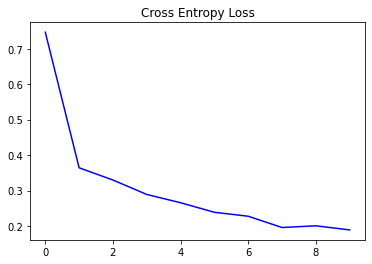

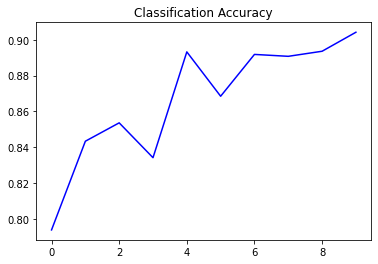

In [0]:


# plot loss
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
# plot accuracy
plt.show()
plt.title('Classification Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='train')
# save plot to file
#filename = sys.argv[0].split('/')[-1]
#pyplot.savefig(filename + '_plot.png')
#pyplot.close()

In [0]:
history_50 = {'loss': [0.38219307693213167, 0.30008000189016165, 0.2606684215649168, 0.22920476918467053, 0.19918257790493826, 0.1785649987429323, 0.15518065103896167, 0.14067280509759772, 0.12677612750418366, 0.12427297571414392, 0.11634103128867189, 0.10711885735275332, 0.10367925624933164, 0.09492067669206655, 0.09718105379748053, 0.09248976989702472, 0.0933074447121196, 0.08234634004143296, 0.08846375032004469, 0.08006853813648836, 0.08079343652215115, 0.07963105910095788, 0.07808960938925497, 0.07738950307132268, 0.07584251822065144, 0.07506293630228643, 0.07184641096066843, 0.0734282474098733, 0.07540345987856541, 0.07143799456131902, 0.06853071479611314, 0.07226469060531701, 0.0705878660444699, 0.06565412966918509, 0.06769315312782813, 0.06824612767075523, 0.06957219840746968, 0.06471616183165353, 0.06797657308767459, 0.06039985707394573, 0.06746487078952555, 0.06311000961944635, 0.06232923577021025, 0.07025002847696603, 0.06235380258348961, 0.05958609825853132, 0.06414479789830739, 0.05975608110539113, 0.06681208878901519, 0.06068069900774236], 'accuracy': [0.8400369, 0.8758831, 0.8941474, 0.9077553, 0.92120266, 0.9305154, 0.9385437, 0.9443642, 0.9498234, 0.9516699, 0.9546403, 0.95881504, 0.9586946, 0.9627087, 0.9624679, 0.96640176, 0.9652778, 0.9686496, 0.9665623, 0.96905106, 0.96921164, 0.96917146, 0.9693722, 0.9689708, 0.9706166, 0.9709377, 0.9716201, 0.9719011, 0.9714595, 0.9736673, 0.97342646, 0.97418916, 0.97418916, 0.97519267, 0.9739884, 0.9742293, 0.9738279, 0.97643703, 0.9747913, 0.97768146, 0.9753131, 0.97643703, 0.97615606, 0.9750321, 0.9767582, 0.97784203, 0.9757145, 0.97856456, 0.9757948, 0.9772399], 'val_loss': [0.30269382291102, 0.2819079834257247, 0.2802321842812389, 0.26508132183138344, 0.26397677231041683, 0.2649551777309076, 0.279015296973245, 0.2837551761138646, 0.2943173665014995, 0.30245560411945244, 0.3078454303086838, 0.2966962635861656, 0.3058454533016062, 0.33613951047720936, 0.3257099127321574, 0.3410184531542607, 0.33829438238474674, 0.3463688442817313, 0.3457163965081893, 0.3641677646967717, 0.3683512225488707, 0.3716216884941035, 0.3697908303210501, 0.3565156712180617, 0.3698474472830061, 0.37931065580059337, 0.3863370740689294, 0.3947048311288646, 0.38200475904293835, 0.3979331099918123, 0.40645858404264285, 0.3874540440953536, 0.41463098705159446, 0.3984858174889074, 0.3766401392876068, 0.40791694484005087, 0.4409557611525403, 0.43332331786955025, 0.4054867672610145, 0.4134465533529403, 0.44227883099131504, 0.4346779815723441, 0.4400867839596864, 0.4446623271944895, 0.4389370588553434, 0.41949108759791864, 0.4432645159305176, 0.45409768044604043, 0.43418873915438017, 0.43451861606512454], 'val_accuracy': [0.8811416, 0.88836706, 0.89270234, 0.90065026, 0.90317917, 0.9028179, 0.9020954, 0.91004336, 0.900289, 0.8995665, 0.9067919, 0.91112715, 0.9053468, 0.8995665, 0.90390176, 0.90317917, 0.9035405, 0.9035405, 0.90498555, 0.900289, 0.9057081, 0.90065026, 0.90245664, 0.9028179, 0.9010116, 0.90245664, 0.8952312, 0.8966763, 0.9020954, 0.8981214, 0.8977601, 0.8995665, 0.90498555, 0.9053468, 0.90751445, 0.9057081, 0.8992052, 0.9089595, 0.9053468, 0.90390176, 0.900289, 0.90245664, 0.89450866, 0.900289, 0.90498555, 0.9020954, 0.9010116, 0.90137285, 0.8952312, 0.8984827]}

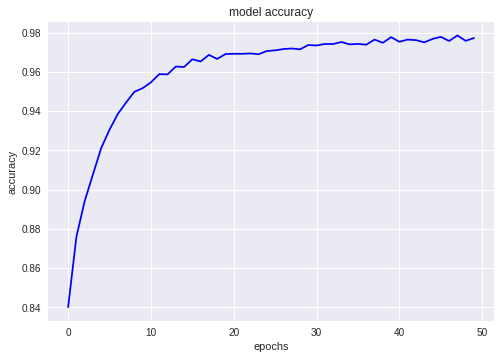

Text(0.5, 0, 'epochs')

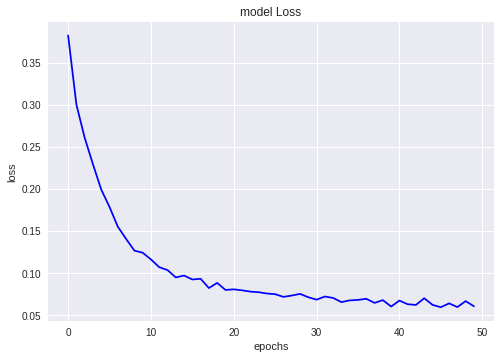

In [0]:
from matplotlib import style
import matplotlib.pyplot as plt

style.use('seaborn')
# plot accuracy
plt.title('model accuracy')
plt.plot(history_50['accuracy'], color='blue')
'''plt.plot(history.history['val_accuracy'], color='green')'''
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.show()
# plot loss
plt.plot(history_50['loss'], color='blue')
'''plt.plot(history.history['val_loss'], color='green')'''
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')

**Auto-Keras**

In [11]:
!pip install autokeras

     |████████████████████████████████| 71kB 108kB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=16bf9e64e9c0f6b14e1001f9132b219c7f3851640af77511e4ffb961e205af6c
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=e5ff9341926105dbf6ba8a053694a375ab46eaefae977a4ce09ea48e4b26cbfe
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [0]:
# USAGE
# python train_auto_keras.py

# import the necessary packages
from sklearn.metrics import classification_report
import autokeras as ak
import os

In [0]:
'''trainX, testX, trainY, testY = train_test_split(images_data, Y, test_size=0.20)
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.25)
'''
trainX = load('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/trainX.npy')
testX = load('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/testX.npy')
trainY = load('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/trainY.npy')
testY = load('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/testY.npy')
valX = load('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/valX.npy')
valY = load('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/valY.npy')


In [0]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape, testY.shape)
print(valX.shape, valY.shape)

(14400, 64, 64, 3)
(14400,)
(4800, 64, 64, 3) (4800,)
(4800, 64, 64, 3) (4800,)


In [0]:
trainX1, testX1, trainY1, testY1 = train_test_split(images_data, Y, test_size=0.20)
trainX1, valX1, trainY1, valY1 = train_test_split(trainX1, trainY1, test_size=0.25)
'''
np.save('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/For Graph/trainX_29K.npy', trainX)
np.save('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/For Graph/testX_29K.npy', testX)
np.save('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/For Graph/trainY_29K.npy', trainY)
np.save('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/For Graph/testY_29K.npy', testY)
np.save('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/For Graph/valX_29K.npy', valX)
np.save('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/For Graph/valY_29K.npy', valY)
'''

"\nnp.save('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/For Graph/trainX_29K.npy', trainX)\nnp.save('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/For Graph/testX_29K.npy', testX)\nnp.save('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/For Graph/trainY_29K.npy', trainY)\nnp.save('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/For Graph/testY_29K.npy', testY)\nnp.save('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/For Graph/valX_29K.npy', valX)\nnp.save('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/For Graph/valY_29K.npy', valY)\n"

In [0]:
trainX_more = np.concatenate((trainX, trainX1), axis=0)
trainY_more = np.concatenate((trainY, trainY1), axis=0)
testX_more = np.concatenate((testX, testX1), axis=0)
testY_more = np.concatenate((testY, testY1), axis=0)
valX_more = np.concatenate((valX, valX1), axis=0)
valY_more = np.concatenate((valY, valY1), axis=0)

In [0]:
print(trainX.shape, trainX1.shape, trainX_more.shape)
print(trainY.shape, trainY1.shape, trainY_more.shape)

print(testX.shape, testX1.shape, testX_more.shape)
print(testY.shape, testY1.shape, testY_more.shape)

print(valX.shape, valX1.shape, valX_more.shape)
print(valY.shape, valY1.shape, valY_more.shape)

(14145, 64, 64, 3) (20760, 64, 64, 3) (34905, 64, 64, 3)
(14145,) (20760,) (34905,)
(4716, 64, 64, 3) (6920, 64, 64, 3) (11636, 64, 64, 3)
(4716,) (6920,) (11636,)
(4715, 64, 64, 3) (6920, 64, 64, 3) (11635, 64, 64, 3)
(4715,) (6920,) (11635,)


In [0]:
#Auto-Keras
model = ak.ImageClassifier(max_trials=10)
model.fit(trainX, trainY, validation_data=(valX, valY), epochs=10)

Train for 450 steps, validate for 150 steps
Epoch 1/10
450/450 [==============================] - 112s 249ms/step - loss: 0.1626 - accuracy: 0.9384 - val_loss: 0.0895 - val_accuracy: 0.9694
Epoch 2/10
450/450 [==============================] - 111s 246ms/step - loss: 0.0772 - accuracy: 0.9727 - val_loss: 0.0762 - val_accuracy: 0.9731
Epoch 3/10
450/450 [==============================] - 110s 244ms/step - loss: 0.0572 - accuracy: 0.9786 - val_loss: 0.0744 - val_accuracy: 0.9760
Epoch 4/10
450/450 [==============================] - 110s 243ms/step - loss: 0.0449 - accuracy: 0.9833 - val_loss: 0.0947 - val_accuracy: 0.9702
Epoch 5/10
450/450 [==============================] - 109s 243ms/step - loss: 0.0347 - accuracy: 0.9881 - val_loss: 0.0795 - val_accuracy: 0.9783
Epoch 6/10
450/450 [==============================] - 111s 248ms/step - loss: 0.0310 - accuracy: 0.9887 - val_loss: 0.0714 - val_accuracy: 0.9787
Epoch 7/10
450/450 [==============================] - 109s 242ms/step - loss: 0.

Train for 450 steps, validate for 150 steps
Epoch 1/10
450/450 [==============================] - 986s 2s/step - loss: 0.1166 - accuracy: 0.9598 - val_loss: 0.0524 - val_accuracy: 0.9831
Epoch 2/10
450/450 [==============================] - 968s 2s/step - loss: 0.0459 - accuracy: 0.9847 - val_loss: 0.0695 - val_accuracy: 0.9794
Epoch 3/10
450/450 [==============================] - 970s 2s/step - loss: 0.0470 - accuracy: 0.9849 - val_loss: 0.0554 - val_accuracy: 0.9812
Epoch 4/10
450/450 [==============================] - 964s 2s/step - loss: 0.0344 - accuracy: 0.9878 - val_loss: 0.0577 - val_accuracy: 0.9825
Epoch 5/10
450/450 [==============================] - 957s 2s/step - loss: 0.0255 - accuracy: 0.9912 - val_loss: 0.0526 - val_accuracy: 0.9831
Epoch 6/10
450/450 [==============================] - 971s 2s/step - loss: 0.0238 - accuracy: 0.9915 - val_loss: 3.7348 - val_accuracy: 0.7702
Epoch 7/10
450/450 [==============================] - 968s 2s/step - loss: 0.0242 - accuracy: 0.99

Train for 450 steps, validate for 150 steps
Epoch 1/10
450/450 [==============================] - 996s 2s/step - loss: 0.1088 - accuracy: 0.9602 - val_loss: 0.7354 - val_accuracy: 0.8948
Epoch 2/10
450/450 [==============================] - 973s 2s/step - loss: 0.0426 - accuracy: 0.9851 - val_loss: 0.0926 - val_accuracy: 0.9767
Epoch 3/10
450/450 [==============================] - 973s 2s/step - loss: 0.0356 - accuracy: 0.9870 - val_loss: 0.0549 - val_accuracy: 0.9833
Epoch 4/10
450/450 [==============================] - 992s 2s/step - loss: 0.0306 - accuracy: 0.9878 - val_loss: 0.0577 - val_accuracy: 0.9810
Epoch 5/10
450/450 [==============================] - 977s 2s/step - loss: 0.0299 - accuracy: 0.9892 - val_loss: 0.0464 - val_accuracy: 0.9848
Epoch 6/10
450/450 [==============================] - 959s 2s/step - loss: 0.0230 - accuracy: 0.9912 - val_loss: 0.0708 - val_accuracy: 0.9792
Epoch 7/10
450/450 [==============================] - 972s 2s/step - loss: 0.0252 - accuracy: 0.99

INFO:tensorflow:Oracle triggered exit
Train for 450 steps, validate for 150 steps
Epoch 1/10
450/450 [==============================] - 979s 2s/step - loss: 0.1139 - accuracy: 0.9603 - val_loss: 0.1256 - val_accuracy: 0.9692
Epoch 2/10
450/450 [==============================] - 983s 2s/step - loss: 0.0464 - accuracy: 0.9842 - val_loss: 0.0524 - val_accuracy: 0.9817
Epoch 3/10
450/450 [==============================] - 956s 2s/step - loss: 0.0402 - accuracy: 0.9859 - val_loss: 0.0766 - val_accuracy: 0.9748
Epoch 4/10
450/450 [==============================] - 974s 2s/step - loss: 0.0273 - accuracy: 0.9897 - val_loss: 0.1183 - val_accuracy: 0.9688
Epoch 5/10
450/450 [==============================] - 997s 2s/step - loss: 0.0284 - accuracy: 0.9892 - val_loss: 0.0581 - val_accuracy: 0.9829
Epoch 6/10
450/450 [==============================] - 980s 2s/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.0541 - val_accuracy: 0.9819
Epoch 7/10
450/450 [==============================] - 978s 2

12K values
INFO:tensorflow:Oracle triggered exit
Train for 450 steps, validate for 150 steps
Epoch 1/10
450/450 [==============================] - 979s 2s/step - loss: 0.1139 - accuracy: 0.9603 - val_loss: 0.1256 - val_accuracy: 0.9692
Epoch 2/10
450/450 [==============================] - 983s 2s/step - loss: 0.0464 - accuracy: 0.9842 - val_loss: 0.0524 - val_accuracy: 0.9817
Epoch 3/10
450/450 [==============================] - 956s 2s/step - loss: 0.0402 - accuracy: 0.9859 - val_loss: 0.0766 - val_accuracy: 0.9748
Epoch 4/10
450/450 [==============================] - 974s 2s/step - loss: 0.0273 - accuracy: 0.9897 - val_loss: 0.1183 - val_accuracy: 0.9688
Epoch 5/10
450/450 [==============================] - 997s 2s/step - loss: 0.0284 - accuracy: 0.9892 - val_loss: 0.0581 - val_accuracy: 0.9829
Epoch 6/10
450/450 [==============================] - 980s 2s/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.0541 - val_accuracy: 0.9819
Epoch 7/10
450/450 [==============================] - 978s 2s/step - loss: 0.0220 - accuracy: 0.9916 - val_loss: 0.0989 - val_accuracy: 0.9725
Epoch 8/10
450/450 [==============================] - 978s 2s/step - loss: 0.0199 - accuracy: 0.9925 - val_loss: 0.0585 - val_accuracy: 0.9817
Epoch 9/10
450/450 [==============================] - 973s 2s/step - loss: 0.0167 - accuracy: 0.9934 - val_loss: 0.0647 - val_accuracy: 0.9846
Epoch 10/10
450/450 [==============================] - 955s 2s/step - loss: 0.0166 - accuracy: 0.9948 - val_loss: 0.0753 - val_accuracy: 0.9777

In [0]:
trained_model = model.export_model()

In [0]:
trained_model.evaluate(testX,testY)

4800/4800 [==============================] - 27s 6ms/sample - loss: 0.0706 - accuracy: 0.9819


[0.07059851154105369, 0.981875]

In [0]:
trained_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
normalization (Normalization)   (None, 64, 64, 3)    7           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           normalization[0][0]              
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
______________________________________________________________________________________________

In [0]:
trained_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
normalization (Normalization)   (None, 64, 64, 3)    7           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           normalization[0][0]              
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
______________________________________________________________________________________________

In [0]:
history = trained_model.fit(trainX_more, trainY_more, validation_data=(valX_more, valY_more), epochs=20)

Train on 34905 samples, validate on 11635 samples
Epoch 1/20
34905/34905 [==============================] - 2327s 67ms/sample - loss: 0.2599 - accuracy: 0.8998 - val_loss: 0.2354 - val_accuracy: 0.9145
Epoch 2/20
34905/34905 [==============================] - 2309s 66ms/sample - loss: 0.1884 - accuracy: 0.9271 - val_loss: 0.2395 - val_accuracy: 0.9151
Epoch 3/20
34905/34905 [==============================] - 2329s 67ms/sample - loss: 0.1573 - accuracy: 0.9399 - val_loss: 0.2307 - val_accuracy: 0.9191
Epoch 4/20
25760/34905 [=====================>........] - ETA: 9:45 - loss: 0.1235 - accuracy: 0.9535

**SAVing and Laoding a Model**

In [0]:
path_to_save_model = '/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/12K/vgg_model'

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
#  # %tensorflow_version only exists in Colab.
#  !pip install tf-nightly
#except Exception:
#  pass
import tensorflow_datasets as tfds

import tensorflow as tf
tfds.disable_progress_bar()

In [0]:
#keras_model_path = "/content/drive/My Drive/Adverserial_ML/AndroZoo/APKs_Images/Auto_Keras_Reports"
trained_model.save(path_to_save_model)  # save() should be called out of strategy scope

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/vgg_model/assets


In [0]:
restored_VGG_12_model = tf.keras.models.load_model(path_to_save_model)
#restored_keras_model.fit(train_dataset, epochs=2)

In [0]:
restored_VGG_12_model.summary()

In [0]:
history = restored_model.fit(trainX, trainY, validation_data=(valX, valY), epochs=100)

Train on 14400 samples, validate on 4800 samples
Epoch 1/100
14400/14400 [==============================] - 1031s 72ms/sample - loss: 0.0341 - accuracy: 0.9879 - val_loss: 0.0555 - val_accuracy: 0.9833
Epoch 2/100
14400/14400 [==============================] - 984s 68ms/sample - loss: 0.0230 - accuracy: 0.9919 - val_loss: 0.0464 - val_accuracy: 0.9844
Epoch 3/100
14400/14400 [==============================] - 978s 68ms/sample - loss: 0.0210 - accuracy: 0.9922 - val_loss: 0.1548 - val_accuracy: 0.9733
Epoch 4/100
14400/14400 [==============================] - 1003s 70ms/sample - loss: 0.0179 - accuracy: 0.9931 - val_loss: 0.0442 - val_accuracy: 0.9871
Epoch 5/100
14400/14400 [==============================] - 984s 68ms/sample - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0583 - val_accuracy: 0.9852
Epoch 6/100
14400/14400 [==============================] - 1011s 70ms/sample - loss: 0.0117 - accuracy: 0.9958 - val_loss: 0.0623 - val_accuracy: 0.9840
Epoch 7/100
14400/14400 [===========

In [0]:

restored_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
normalization (Normalization (None, 64, 64, 3)         7         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0     

In [0]:
print(images_data.shape)
print(Y.shape)

(34770, 64, 64, 3)
(34770,)


In [0]:
trainX, testX, trainY, testY = train_test_split(images_data, Y, test_size=0.2)


In [0]:
history = restored_model.fit(trainX, trainY, validation_split=0.1, batch_size=64, epochs=50)

Train on 25034 samples, validate on 2782 samples
Epoch 1/50
25034/25034 [==============================] - 347s 14ms/sample - loss: 0.3842 - accuracy: 0.8365 - val_loss: 0.3056 - val_accuracy: 0.8760
Epoch 2/50
25034/25034 [==============================] - 346s 14ms/sample - loss: 0.2989 - accuracy: 0.8732 - val_loss: 0.3028 - val_accuracy: 0.8746
Epoch 3/50
25034/25034 [==============================] - 349s 14ms/sample - loss: 0.2576 - accuracy: 0.8939 - val_loss: 0.2733 - val_accuracy: 0.8900
Epoch 4/50
25034/25034 [==============================] - 348s 14ms/sample - loss: 0.2274 - accuracy: 0.9073 - val_loss: 0.2627 - val_accuracy: 0.8950
Epoch 5/50
25034/25034 [==============================] - 346s 14ms/sample - loss: 0.2006 - accuracy: 0.9174 - val_loss: 0.2566 - val_accuracy: 0.9012
Epoch 6/50
25034/25034 [==============================] - 347s 14ms/sample - loss: 0.1776 - accuracy: 0.9291 - val_loss: 0.2747 - val_accuracy: 0.8879
Epoch 7/50
25034/25034 [=====================

In [0]:
path_to_save_model = '/content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Auto_keras_new/Binary_model_12Plus18'
restored_model.save(path_to_save_model)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Adverserial_ML/AndroZoo/APKs_and_Images/Auto_keras_new/Binary_model_12Plus18/assets


In [0]:
testX = load('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/12K/testX.npy')
testY = load('/content/gdrive/My Drive/Research-Adverserial_ML/AndroZoo/APKs_and_Images/Malware_Images/Androguard_and_PreDefined_Values/Inter_Linear/12K/testY.npy')
restored_VGG_12_model.evaluate(testX,testY)

4800/4800 [==============================] - 29s 6ms/sample - loss: 0.0706 - accuracy: 0.9819


[0.07059679258288573, 0.981875]

In [0]:
predictions = restored_VGG_12_model.predict(testX)
y_predict = predictions.reshape((predictions.shape[0]))

NN: auc=0.999


No handles with labels found to put in legend.


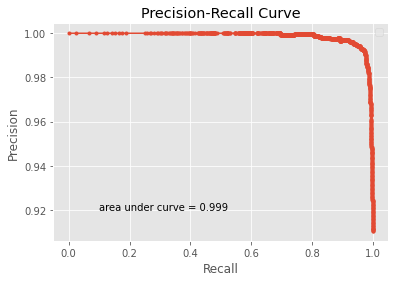

Threshold for splitting benign and malware is :  0.071669444


In [0]:

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot, style

precision, recall, thresholds = precision_recall_curve(testY, y_predict)
area_uc = auc(recall, precision)
# summarize scores
print('NN: auc=%.3f' % (area_uc))
style.use('ggplot')
# plot the precision-recall curves
#no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot(recall, precision, marker='.')
#pyplot.plot()
# axis labels


pyplot.text(0.1,0.92, 'area under curve = %.3f' % (area_uc))
pyplot.title('Precision-Recall Curve')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend plt.legend(['train', 'test'], loc='upper left')
pyplot.legend()
# show the plot
pyplot.show()


prcsn = np.array(precision)
recl = np.array(recall)
f1_measure = 2*(prcsn*recl)/(prcsn+recl)
threshold = thresholds[np.argmax(f1_measure)]
print('Threshold for splitting benign and malware is : ',threshold)


In [0]:
from sklearn.metrics import confusion_matrix
y_pred = np.zeros_like(y_predict)
y_idx = [y_predict >= 0.071669444]
y_pred[y_idx] = 1
conf_mtrx = confusion_matrix(testY, y_pred)
print(conf_mtrx)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


[[2387   43]
 [  33 2337]]


In [0]:
def different_evaluations(tn, fp, fn, tp, y_test, y_pred):
  # FPr and RNr
  FPr = fp/ (fp+tn)
  FNr = fn/ (fn+tp)
  print("False positive rate is : ", FPr)
  print("False negative rate is : ", FNr)
  # F1-score
  print("The F1-score is : ", f1_score(y_test, y_pred))

  # Recall
  print("The Recall is : ", recall_score(y_test, y_pred))

  # Precision
  print("The Precision score is : ", precision_score(y_test, y_pred))

In [0]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

tn, fp, fn, tp = conf_mtrx.ravel()

different_evaluations(tn, fp, fn, tp, testY, y_pred)

False positive rate is :  0.017695473251028805
False negative rate is :  0.013924050632911392
The F1-score is :  0.984
The Recall is :  0.9860759493670886
The Precision score is :  0.9819327731092437


In [0]:


#import libraries
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot



precision, recall, thresh = precision_recall_curve(testY, y_predict)
area_uc = auc(recall, precision)
# summarize scores
print('NN: auc=%.3f' % (area_uc))
# plot the precision-recall curves
#no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot(recall, precision, marker='.', label='3-layers NN')
pyplot.plot()
# axis labels
pyplot.text(0.0,0.2, 'area under curve =%.3f' % (area_uc))
pyplot.title('Precision-Recall Curve')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()



NameError: ignored

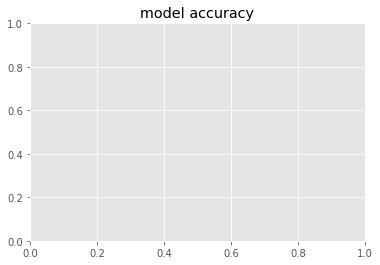

In [0]:
from matplotlib import style
style.use('ggplot')
# plot accuracy
plt.title('model accuracy')
plt.plot(history.history['accuracy'], color='blue')
'''plt.plot(history.history['val_accuracy'], color='green')'''
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.show()
# plot loss
plt.plot(history.history['loss'], color='blue')
'''plt.plot(history.history['val_loss'], color='green')'''
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.show()
# plot loss
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='green')
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['traing loss', 'val_loss'], loc='upper left')

In [0]:
print(model.summary())

In [0]:
trainX, testX, trainY, testY = train_test_split(images_data, Y, test_size=0.25)
history = model.fit(trainX, trainY, validation_split=0.1, batch_size=64, epochs=10)

Train on 16200 samples, validate on 1800 samples
Epoch 1/10
16200/16200 [==============================] - 219s 14ms/step - loss: 0.3386 - acc: 0.8566 - val_loss: 0.2875 - val_acc: 0.8739
Epoch 2/10
16200/16200 [==============================] - 219s 14ms/step - loss: 0.2770 - acc: 0.8881 - val_loss: 0.2746 - val_acc: 0.8839
Epoch 3/10
16200/16200 [==============================] - 219s 14ms/step - loss: 0.2386 - acc: 0.9063 - val_loss: 0.2332 - val_acc: 0.9067
Epoch 4/10
16200/16200 [==============================] - 221s 14ms/step - loss: 0.2164 - acc: 0.9169 - val_loss: 0.2535 - val_acc: 0.9028
Epoch 5/10
16200/16200 [==============================] - 219s 14ms/step - loss: 0.1851 - acc: 0.9301 - val_loss: 0.2217 - val_acc: 0.9122
Epoch 6/10
16200/16200 [==============================] - 218s 13ms/step - loss: 0.1715 - acc: 0.9338 - val_loss: 0.2179 - val_acc: 0.9167
Epoch 7/10
16200/16200 [==============================] - 220s 14ms/step - loss: 0.1639 - acc: 0.9378 - val_loss: 0.2

KeyboardInterrupt: ignored

In [0]:
print(restored_model.layers[0].get_config())


{'batch_input_shape': (None, 64, 64, 3), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_1'}


In [0]:
print(restored_model.layers[1].get_config())

{'name': 'normalization', 'trainable': True, 'dtype': 'float32', 'axis': -1}


In [0]:
print(restored_model.layers[2].get_config())

{'name': 'conv2d', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


In [0]:
print(restored_model.layers[3].get_config())


{'name': 'conv2d_1', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


In [0]:
print(restored_model.layers[4].get_config())


{'name': 'max_pooling2d', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}


In [0]:
print(restored_model.layers[5].get_config())


{'name': 'dropout', 'trainable': True, 'dtype': 'float32', 'rate': 0.25, 'noise_shape': None, 'seed': None}


In [0]:
print(restored_model.layers[6].get_config())


{'name': 'flatten', 'trainable': True, 'dtype': 'float32', 'data_format': 'channels_last'}


In [0]:
print(restored_model.layers[7].get_config())


{'name': 'dropout_1', 'trainable': True, 'dtype': 'float32', 'rate': 0.5, 'noise_shape': None, 'seed': None}


In [0]:
print(restored_model.layers[8].get_config())


{'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


In [0]:
print(restored_model.layers[9].get_config())


{'name': 'classification_head_1', 'trainable': True, 'dtype': 'float32'}


In [0]:
print(restored_model.layers[10].get_config())


IndexError: ignored

In [0]:
from keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())

553467904/553467096 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [0]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights=None)
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     